In [1]:
from preprocessing import * # importing preprocessing file to deal with processed data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [370]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating Helper Function to Evaluate Model 

In [348]:
# model evaluation 
def model_evaluate(model, X_train_balanced, y_train_balanced,X_val, y_val):
    model.fit(X_train_balanced, y_train_balanced) # fitting model to train data (trainning process)
    y_pred_train=model.predict(X_train_balanced)  # calculating y train predicted values
    y_pred_val=model.predict(X_val) # calculating y validation predicted values
    acc_train=accuracy_score(y_train_balanced , y_pred_train) # train accuracy
    acc_val = accuracy_score(y_val, y_pred_val)               # validation accuracy
    return acc_train, acc_val

# optimizing parameters using nested iterations 

In [349]:
acc_train_values = []  # to carry accuracy train values 
acc_val_values = []   # to carry accuracy validation values 
# the next 4 sets purpuse is to carry all possible values for each parameter
# and then use these values to build a data fram of all possible combintions of parameters 
criterion_list =[]
max_depth_list = []
n_estimators_list=[]
acc_diff_list=[]

for n_estimators in list(range(100, 1000,100)):
    for max_depth in  list(range(2, 11)):
        for criterion in['gini', 'entropy'] :
            RF = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,criterion=criterion,random_state=0)
            acc_train, acc_val = model_evaluate(RF, X_train_balanced, y_train_balanced, X_val, y_val)
            
            acc_train_values.append(acc_train) 
            acc_val_values.append(acc_val)
            criterion_list.append (criterion)
            max_depth_list.append (max_depth)
            n_estimators_list.append (n_estimators)
            acc_diff_list.append(abs(acc_val-acc_train)) # get the differnce between acc_train and acc_val

           
        
            
            
            
results = pd.DataFrame({
    'n_estimators': n_estimators_list,
    'max_depth': max_depth_list,
    'criterion': criterion_list,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
    'acc_diff' : acc_diff_list, 
})
results.head(10)
                        

,n_estimators,max_depth,criterion,acc_train,acc_val,acc_diff
0,100,2,gini,0.783981,0.810651,0.026670
1,100,2,entropy,0.779935,0.813018,0.033082
2,100,3,gini,0.794498,0.827219,0.032721
3,100,3,entropy,0.790453,0.821302,0.030849
4,100,4,gini,0.810680,0.840237,0.029557
5,100,4,entropy,0.810680,0.840237,0.029557
6,100,5,gini,0.825243,0.841420,0.016177
7,100,5,entropy,0.822006,0.839053,0.017047
8,100,6,gini,0.856796,0.841420,0.015376
9,100,6,entropy,0.845469,0.839053,0.006416


In [350]:
#print the smallest 10 differences (the top nearest two values of acc_train and acc_val ) 
best_results=results.nsmallest(10, 'acc_diff')

In [351]:
best_results

,n_estimators,max_depth,criterion,acc_train,acc_val,acc_diff
99,600,6,entropy,0.841424,0.841420,0.000004
27,200,6,entropy,0.843851,0.843787,0.000064
81,500,6,entropy,0.842233,0.841420,0.000813
45,300,6,entropy,0.841424,0.840237,0.001187
117,700,6,entropy,0.843042,0.841420,0.001622
132,800,5,gini,0.837379,0.839053,0.001675
135,800,6,entropy,0.842233,0.840237,0.001996
114,700,5,gini,0.834142,0.836686,0.002544
78,500,5,gini,0.833333,0.836686,0.003353
96,600,5,gini,0.833333,0.836686,0.003353


In [352]:
# adding an index column to use with data visualization  
top_ten=best_results
top_ten.insert(0, "case", [1,2,3,4,5,6,7,8,9,10], True)

In [353]:
top_ten

,case,n_estimators,max_depth,criterion,acc_train,acc_val,acc_diff
99,1,600,6,entropy,0.841424,0.841420,0.000004
27,2,200,6,entropy,0.843851,0.843787,0.000064
81,3,500,6,entropy,0.842233,0.841420,0.000813
45,4,300,6,entropy,0.841424,0.840237,0.001187
117,5,700,6,entropy,0.843042,0.841420,0.001622
132,6,800,5,gini,0.837379,0.839053,0.001675
135,7,800,6,entropy,0.842233,0.840237,0.001996
114,8,700,5,gini,0.834142,0.836686,0.002544
78,9,500,5,gini,0.833333,0.836686,0.003353
96,10,600,5,gini,0.833333,0.836686,0.003353


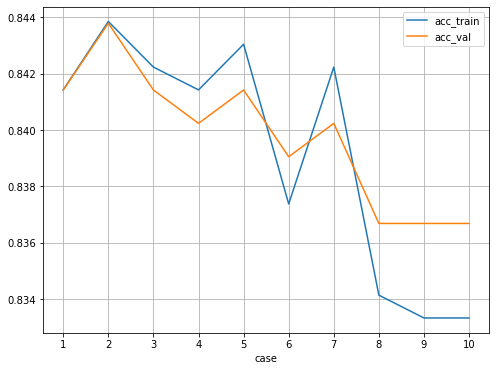

In [354]:
import matplotlib.pyplot as plt
%matplotlib inline

top_ten.plot(x='case', y=['acc_train', 'acc_val'], figsize=(8, 6))
plt.grid(axis='both')

plt.xticks(np.arange(1,11, 1))
plt.show()

# from the top_ten table and plot we conclude that the best case is case 1 when: 
# n_estimators = 600 , max_depth = 6 and criterion is entropy

# optimizing parameters using gridsearchCV

RF = RandomForestClassifier()

In [355]:
# using gridsearchCV to get the best parameters combination 
forest_params = [{'n_estimators' : list(range(70, 124,1)),
                  'max_depth': list(range(2, 9)),
                 'criterion' : ['gini', 'entropy']}] 
# deploying all possible combinations and get the best one
# parameters and all possible values for each 

GS_RF=GridSearchCV(RF,param_grid=forest_params,scoring='accuracy',
                      cv=5 )
GS_RF.fit(X_train_balanced, y_train_balanced) # fitting model using gridsearchCV
GS_RF.best_params_ # get the best compination of parameters 

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 115}

# using GridsearchCV for parameters optemizing we conclude that the best case is  when  :
# n_estimators = 115 , max_depth = 8 and criterion is entropy

# >> optimizing parameters using tervial way
# > optimizing n_estimators

In [356]:
n_estimators_vals = [50, 100, 150, 200, 250,300,350,400,450,500]
#n_estimators_vals = [1000,2000,3000,4000,5000,6000,7000,8000,9000]
acc_train_vals = []
acc_val_vals = []
for estimator in n_estimators_vals:
    RFC = RandomForestClassifier(n_estimators=estimator, max_depth=6, criterion='gini',random_state=0)
    acc_train, acc_val = model_evaluate(RFC, X_train_balanced, y_train_balanced, X_val, y_val)
    acc_train_vals.append(acc_train)
    acc_val_vals.append(acc_val)
    
results = pd.DataFrame({
    'n_estimators': n_estimators_vals,
    'acc_train': acc_train_vals,
    'acc_val': acc_val_vals,
})
results

,n_estimators,acc_train,acc_val
0,50,0.857605,0.846154
1,100,0.856796,0.841420
2,150,0.847896,0.842604
3,200,0.850324,0.843787
4,250,0.851942,0.842604
5,300,0.852751,0.842604
6,350,0.852751,0.836686
7,400,0.854369,0.839053
8,450,0.855987,0.837870
9,500,0.852751,0.836686


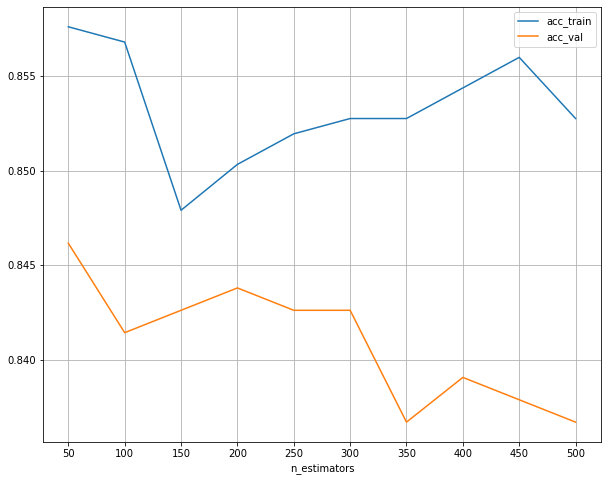

In [357]:
results.plot(x='n_estimators', y=['acc_train', 'acc_val'], figsize=(10, 8))
plt.grid(axis='both')
plt.xticks(n_estimators_vals)
plt.show()

# from the previous plot the best n_estimators value is 150

# > optimizing max_depth

In [358]:
max_depth_vals = [2,3,4,5,6,7,8,9,10,11]
acc_train_vals = []
acc_val_vals = []
for depth in max_depth_vals :
    RFC = RandomForestClassifier(n_estimators=150, max_depth=depth, criterion='gini',random_state=0)
    acc_train, acc_val = model_evaluate(RFC, X_train_balanced, y_train_balanced, X_val, y_val)
    acc_train_vals.append(acc_train)
    acc_val_vals.append(acc_val)
    
results = pd.DataFrame({
    'max_depth': max_depth_vals,
    'acc_train': acc_train_vals,
    'acc_val': acc_val_vals,
})
results

,max_depth,acc_train,acc_val
0,2,0.783172,0.808284
1,3,0.796117,0.827219
2,4,0.810680,0.839053
3,5,0.826861,0.843787
4,6,0.847896,0.842604
5,7,0.885113,0.840237
6,8,0.919094,0.835503
7,9,0.951456,0.848521
8,10,0.974110,0.843787
9,11,0.987055,0.837870


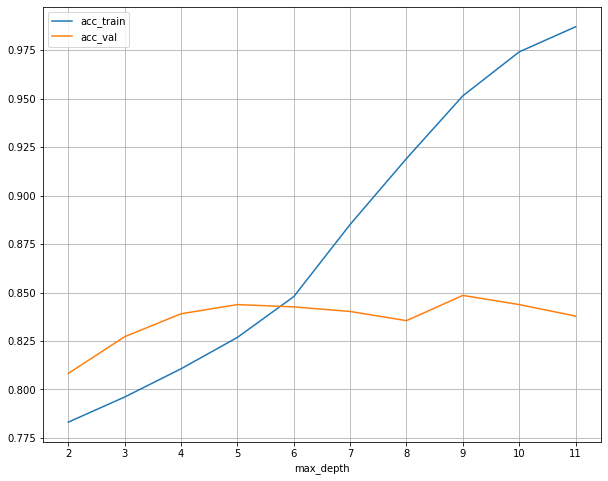

In [359]:
results.plot(x='max_depth', y=['acc_train', 'acc_val'], figsize=(10, 8))
plt.grid(axis='both')
plt.xticks(max_depth_vals)
plt.show()

# from the previous plot the best max_depth value is 6

# > optimizing criterion


In [361]:
criterion_vals = ['gini', 'entropy']
acc_train_vals = []
acc_val_vals = []
for criterion in criterion_vals :
    RFC = RandomForestClassifier(n_estimators=150, max_depth=6,criterion=criterion, random_state=0)
    acc_train, acc_val = model_evaluate(RFC, X_train_balanced, y_train_balanced, X_val, y_val)
    acc_train_vals.append(acc_train)
    acc_val_vals.append(acc_val)
    
results = pd.DataFrame({
    'criterion_vals':criterion_vals,
    'acc_train': acc_train_vals,
    'acc_val': acc_val_vals,
})
results

,criterion_vals,acc_train,acc_val
0,gini,0.847896,0.842604
1,entropy,0.844660,0.839053


# using trivial way for parameters optemizing we conclude that the best case is  when  :
# n_estimators = 150 , max_depth = 6 and criterion is gini

# according to the three methods used above we get three models (best model for each method)
# m1  using >>> nested_optimizing_RF
# m2  using >>> GridsearchCV_optimizing_RF
# m3  using >>> trivial way

In [362]:
m1=RandomForestClassifier(n_estimators=600, max_depth=6, criterion='entropy',random_state=0)
m2=RandomForestClassifier(n_estimators=115, max_depth=8, criterion='entropy',random_state=0)
m3=RandomForestClassifier(n_estimators=150, max_depth=6, criterion='gini',random_state=0)

In [363]:
m1_acc_train, m1_acc_val = model_evaluate(m1, X_train_balanced, y_train_balanced, X_val, y_val)
m2_acc_train, m2_acc_val = model_evaluate(m2, X_train_balanced, y_train_balanced, X_val, y_val)
m3_acc_train, m3_acc_val = model_evaluate(m3, X_train_balanced, y_train_balanced, X_val, y_val)

# testing models 

In [364]:
m1_acc_test = model_evaluate(m1, X_train_balanced, y_train_balanced, X_test, y_test)
m2_acc_test = model_evaluate(m2, X_train_balanced, y_train_balanced, X_test, y_test)
m3_acc_test = model_evaluate(m3, X_train_balanced, y_train_balanced, X_test, y_test)

In [365]:
model=['m1','m2','m3']
model_acc_train=[m1_acc_train, m2_acc_train, m3_acc_train]
model_acc_val=[m1_acc_val, m2_acc_val, m3_acc_val]
model_acc_test=[m1_acc_test[1],m2_acc_test[1],m3_acc_test[1]]
results = pd.DataFrame({
    'model':model,
    'acc_train': model_acc_train,
    'acc_val': model_acc_val,
    'acc_test':model_acc_test
})
results

,model,acc_train,acc_val,acc_test
0,m1,0.841424,0.841420,0.860927
1,m2,0.914239,0.841420,0.865894
2,m3,0.847896,0.842604,0.858444


In [367]:
m1_y_pred_val=m1.predict(X_test)
m2_y_pred_val=m2.predict(X_test)
m3_y_pred_val=m3.predict(X_test)

In [387]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
# confusion_matrix for m1, m2 and m3 
m1_mat = confusion_matrix(y_test, m1_y_pred_val)
m2_mat = confusion_matrix(y_test, m2_y_pred_val)
m3_mat = confusion_matrix(y_test, m3_y_pred_val)


array([[128,  53],
       [115, 912]], dtype=int64)

<Figure size 3600x2400 with 0 Axes>

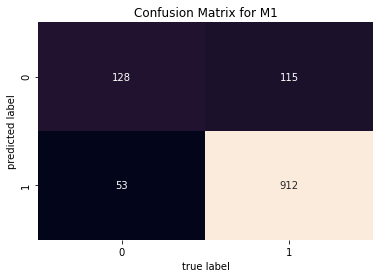

In [392]:
# m1 heat map
sns.heatmap(m1_mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for M1')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("M1_confusion_matrix.png")
plt.show()


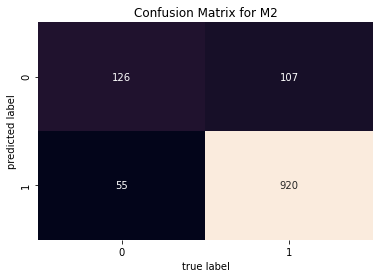

In [393]:
# m2 heat map
sns.heatmap(m2_mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for M2')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("M2_confusion_matrix.png")
plt.show()


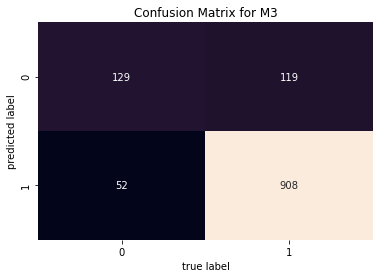

In [394]:
# m3 heat map
sns.heatmap(m3_mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for M3')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("M3_confusion_matrix.png")
plt.show()
